#Astronomy 19 Final Project

Author: April Ewers

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rcParams
import astropy.io.fits
import sep

In [32]:
data = astropy.io.fits.getdata('C:/Users/TechnoPangolin/Documents/ASTR-19-2-FINAL/data/MAST_2025-05-25T2207/MAST_2025-05-25T2207/JWST/jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits', header=False)

In [52]:
print(np.nanmax(data))

5704.062


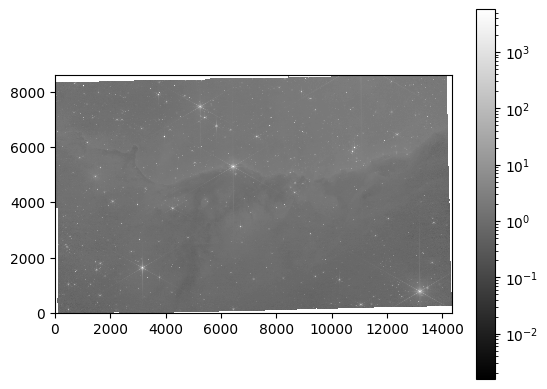

In [53]:
# show the image
plt.imshow(data, interpolation='nearest', cmap='gray', origin='lower', norm=colors.LogNorm())
plt.colorbar();

#save the image
plt.savefig('./imgs/jw02731-o001_t017_nircam_clear-f090w_i2d.png', format='png', dpi=300)

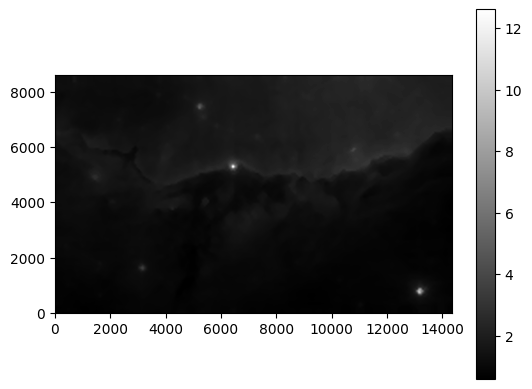

In [56]:
imgdata = data.astype(data.dtype.newbyteorder('='))
bkg = sep.Background(imgdata)
bkg_image = bkg.back()

plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig('./imgs/jw02731-o001_t017_nircam_clear-f090w_i2d_bkg.png', format='png', dpi=300)

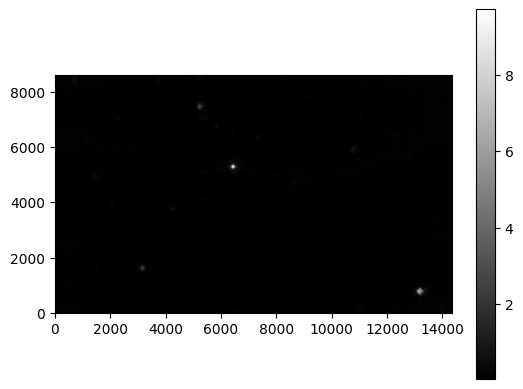

In [57]:
bkg_rms = bkg.rms()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig('./imgs/jw02731-o001_t017_nircam_clear-f090w_i2d_noise.png', format='png', dpi=300)

In [76]:
data_sub = imgdata - bkg
objects = sep.extract(data_sub, 1000, err=bkg.globalrms)

print(f"We found {objects.size} sources.")

We found 1694 sources.


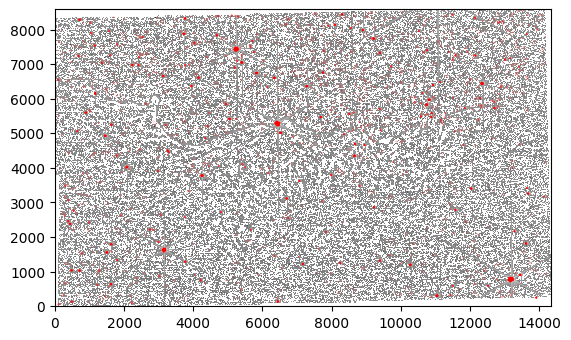

In [77]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               origin='lower', norm=colors.LogNorm())

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('./imgs/jw02731-o001_t017_nircam_clear-f090w_i2d_idents.png', format='png', dpi=300)

In [ ]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 5000, err=bkg.globalrms, gain=1.0)

Text(0, 0.5, 'Instances')

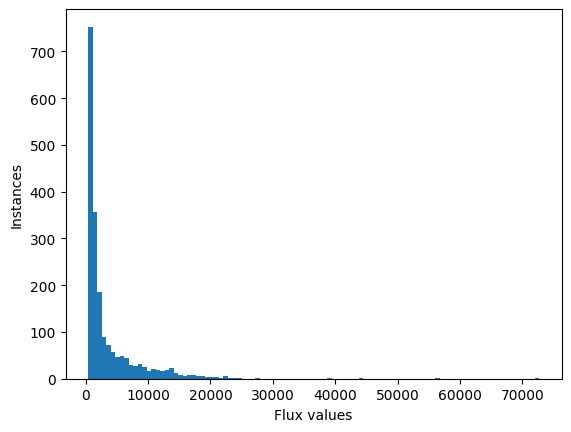

In [69]:
f, ax = plt.subplots()

ax.hist(flux, bins=100)
ax.set_xlabel("Flux values")
ax.set_ylabel("Instances")

In [72]:
print(f"The mean flux was {np.mean(flux)}.")
print(f"The median flux was {np.median(flux)}.")
print(f"The standard deviation of the flux was {np.std(flux)}.")
print(f"The largest outlier was {flux.max()}, which was positioned at ,  in the image and was {flux.max() / np.std(flux)} standard deviations from the mean.")

The mean flux was nan.
The median flux was nan.
The standard deviation of the flux was nan.
The largest outlier was nan, which was positioned at ,  in the image and was nan standard deviations from the mean.
